In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the provided Excel file
file_path ='/content/drive/MyDrive/shared_FG/MyriamsDatasets.xlsx'
df = pd.read_excel(file_path)

labels = df['Label']
neurons = df.drop('Label', axis=1)

neurons.head()

,Soma Size,No. of primary dendrites,No. of secondary dendrites,Length of primary dendrites,Length of secondary dendrites,No. of spines per primary dendrites,No. of spines per secondary dendrites
0,82.12,5,8,34.60000,49.28000,5.800000,9.900000
1,82.99,5,9,30.52000,53.90000,4.100000,10.320000
2,83.89,9,14,24.30291,60.12327,5.222222,14.928571
3,85.97,4,9,31.94000,54.62000,5.500000,12.240000
4,86.90,4,9,29.28000,49.33000,5.100000,13.400000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

#PCA
# Step 1: Standardize the features
scaler = StandardScaler()
neurons_standardized = scaler.fit_transform(neurons)

# 4 componenets allow us to retain 95% of the variance
n_components = 4

# do PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(neurons_standardized)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
final_df = pd.concat([principal_df], axis=1)

In [ ]:
final_df

,PC1,PC2,PC3,PC4
0,1.139629,-2.249241,0.164101,0.839546
1,0.845965,-1.573813,0.293622,1.196971
2,-2.310330,-1.437654,2.859490,1.134804
3,0.938079,-2.019866,-0.522492,0.833614
4,0.922673,-1.719361,-0.464283,0.581937
5,0.711649,-1.753249,0.145638,1.312032
6,1.161243,-1.751089,-0.642247,1.034312
7,0.058936,0.797565,1.979592,0.501246
8,1.835720,0.521806,0.857887,0.671942
9,2.620614,1.516916,0.483871,-0.780355


In [ ]:
!pip install scipy matplotlib seaborn

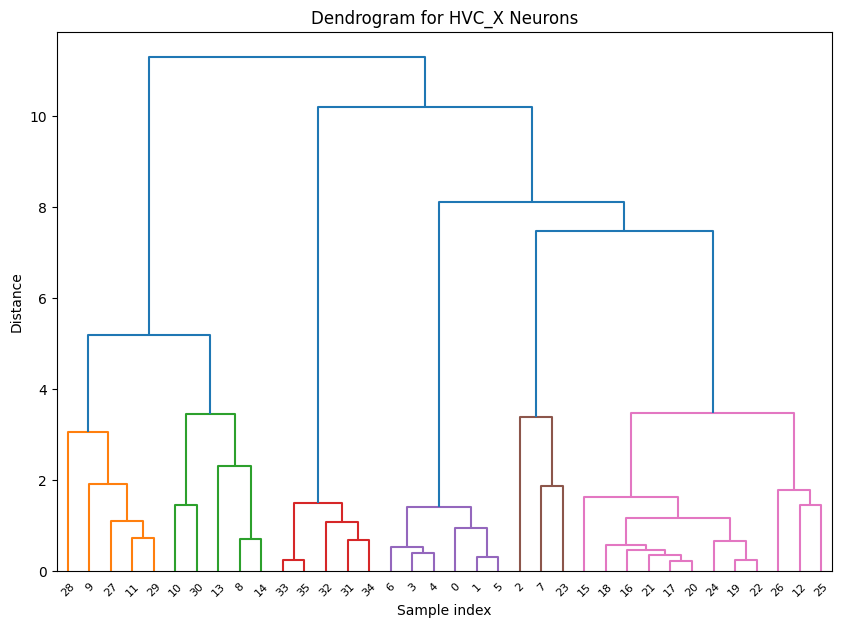

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# hierarchical clustering
linkage_matrix = linkage(final_df, method='ward')

# dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, color_threshold = 5)
plt.title("Dendrogram for HVC_X Neurons")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


0.2795190643168453
0.358177430008855
0.41984237061931445
0.4855997471291368
0.5032151701379941
0.4542687190953416
0.4626416545200846


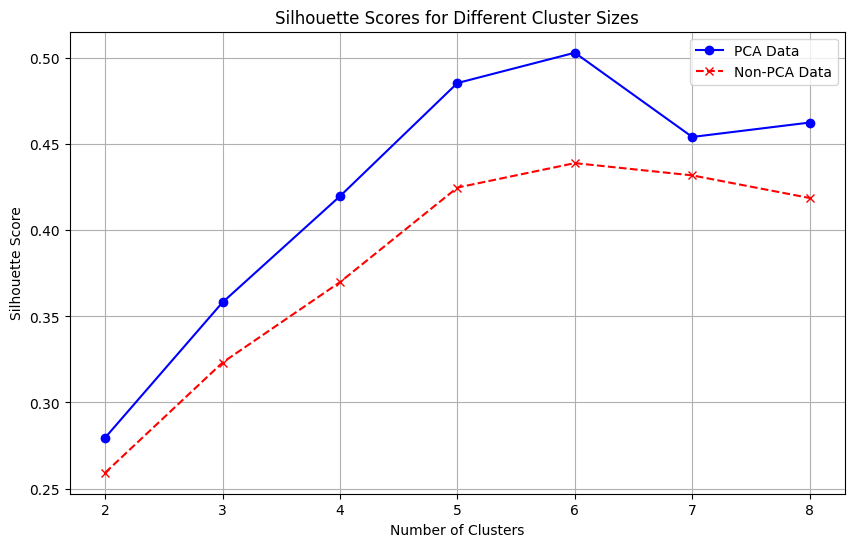

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

data_pca = final_df
data_non_pca = neurons_standardized

# hierarchical clustering both datasets
linkage_matrix_pca = linkage(data_pca, method='ward')
linkage_matrix_non_pca = linkage(data_non_pca, method='ward')

# Range of cluster sizes to evaluate
cluster_sizes = range(2, 9)

# silhouette scores
silhouette_scores_pca = []
silhouette_scores_non_pca = []

for k in cluster_sizes:
    # PCA data
    clusters_pca = fcluster(linkage_matrix_pca, k, criterion='maxclust')
    silhouette_pca = silhouette_score(data_pca, clusters_pca)
    silhouette_scores_pca.append(silhouette_pca)
    print(silhouette_pca)

    # Non-PCA data
    clusters_non_pca = fcluster(linkage_matrix_non_pca, k, criterion='maxclust')
    silhouette_non_pca = silhouette_score(data_non_pca, clusters_non_pca)
    silhouette_scores_non_pca.append(silhouette_non_pca)

plt.figure(figsize=(10, 6))
plt.plot(cluster_sizes, silhouette_scores_pca, marker='o', linestyle='-', color='b', label="PCA Data")
plt.plot(cluster_sizes, silhouette_scores_non_pca, marker='x', linestyle='--', color='r', label="Non-PCA Data")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Cluster Sizes")
plt.grid(True)
plt.legend()
plt.show()


ELbow method:

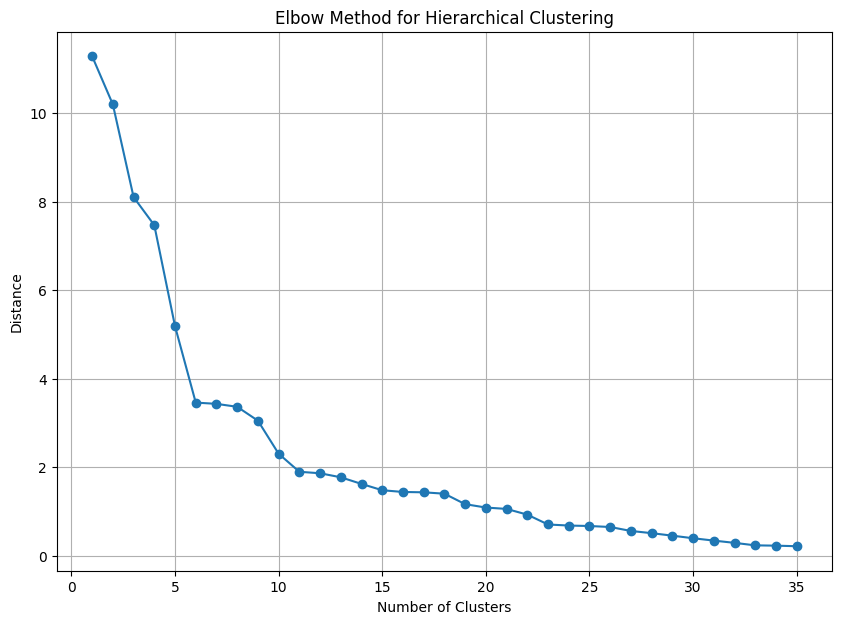

In [ ]:
# distances from the linkage matrix
distances = linkage_matrix[:, 2]  # Third column contains the distances
num_clusters = np.arange(1, len(distances) + 1)  # Number of clusters from 1 to n

# Plot
plt.figure(figsize=(10, 7))
plt.plot(num_clusters, distances[::-1], marker='o')  # Reverse distances to get descending order
plt.title("Elbow Method for Hierarchical Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.grid(True)

plt.show()


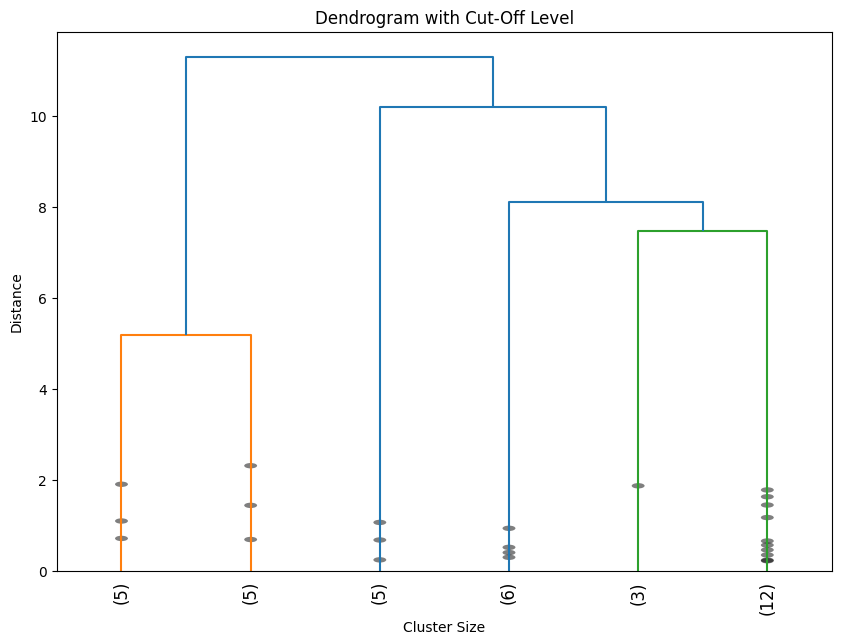

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(final_df, method='ward', metric = 'euclidean')

# dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # only show the last p merges
    p=6,  # number clusters to show
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True,
)
plt.title("Dendrogram with Cut-Off Level")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

num_clusters = 6
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

silhouette = silhouette_score(final_df, clusters)
print("Silhouette Score:", silhouette)

clustered_df = final_df.copy()
clustered_df['cluster'] = clusters
print(clustered_df)

Silhouette Score: 0.5032151701379941
         PC1       PC2       PC3       PC4  cluster
0   1.139629 -2.249241  0.164101  0.839546        4
1   0.845965 -1.573813  0.293622  1.196971        4
2  -2.310330 -1.437654  2.859490  1.134804        5
3   0.938079 -2.019866 -0.522492  0.833614        4
4   0.922673 -1.719361 -0.464283  0.581937        4
5   0.711649 -1.753249  0.145638  1.312032        4
6   1.161243 -1.751089 -0.642247  1.034312        4
7   0.058936  0.797565  1.979592  0.501246        5
8   1.835720  0.521806  0.857887  0.671942        2
9   2.620614  1.516916  0.483871 -0.780355        1
10  2.402335  1.063425 -1.287947  1.878907        2
11  1.138657  1.653752  1.297560 -0.789289        1
12 -0.552401 -0.004226  0.716027 -0.471812        6
13  1.040973 -0.127079 -0.462458 -0.863927        2
14  1.701778  0.029164  0.457014  0.458423        2
15 -0.608555 -1.617298 -0.851377 -1.704854        6
16 -0.688860 -0.860801 -0.544310 -1.523558        6
17 -0.428955 -0.818465 -0.3

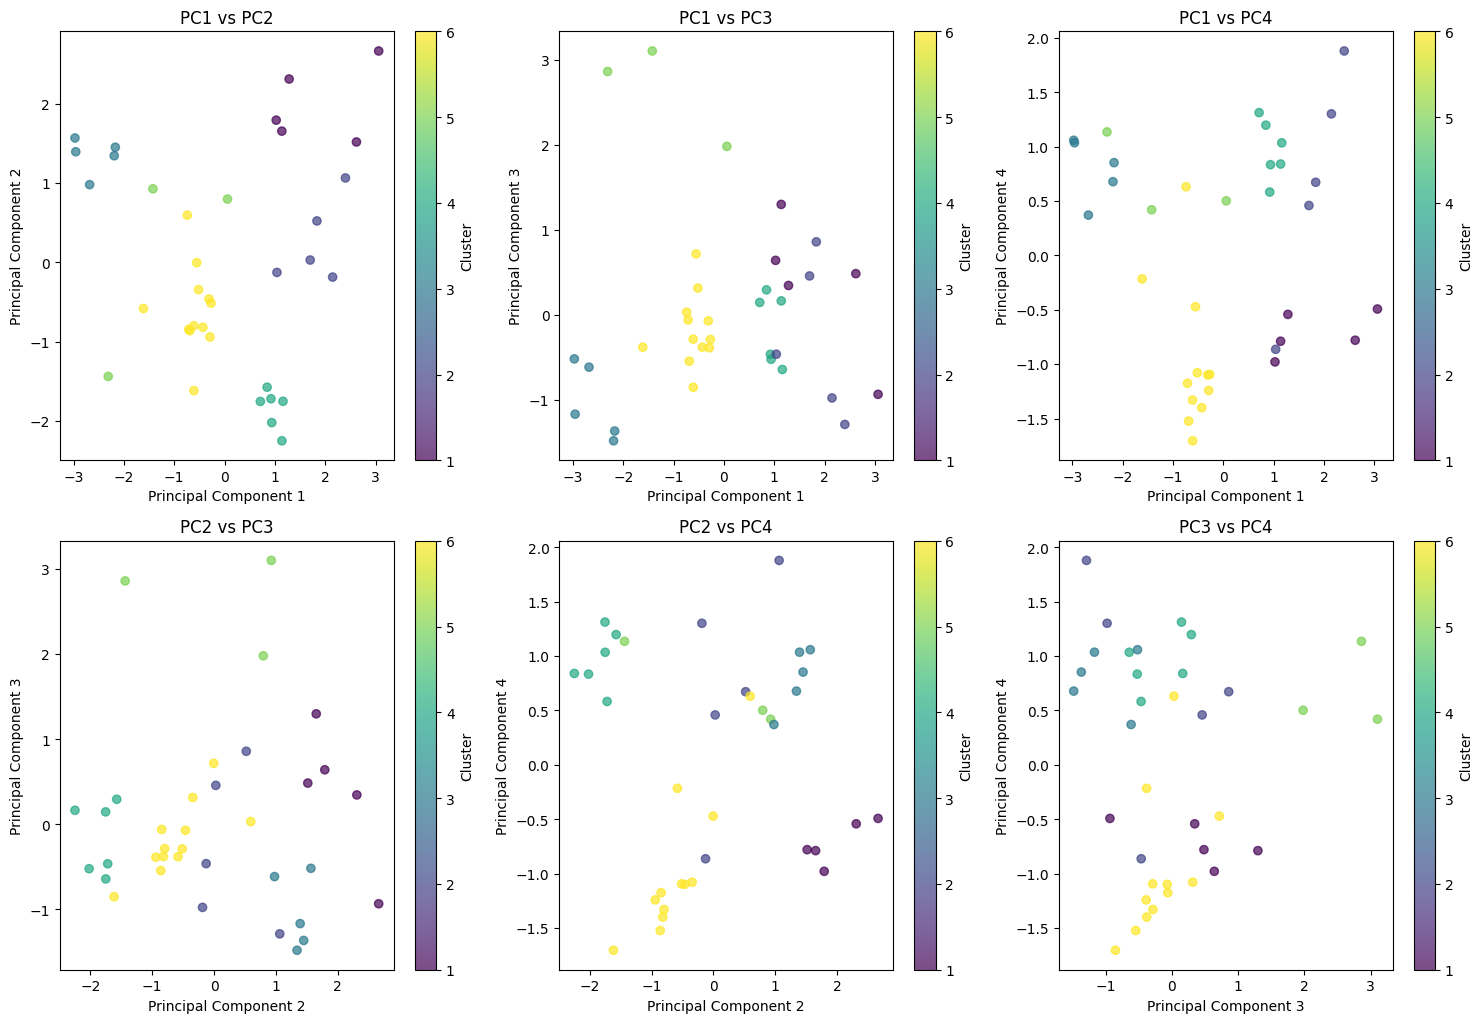

In [ ]:
import itertools

# generate all pairs of principal components
pairs = list(itertools.combinations(range(final_df.shape[1]), 2))

# Visualize clusters for all pairs of principal components
plt.figure(figsize=(15, 15))
for i, (pc1, pc2) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    plt.scatter(final_df.iloc[:, pc1].tolist(), final_df.iloc[:, pc2].tolist(), c=clustered_df.iloc[:,4].tolist(), cmap='viridis', alpha=0.7)
    plt.title(f'PC{pc1 + 1} vs PC{pc2 + 1}')
    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

Tuning Linkage methods:

Silhouette Score for single linkage: 0.3256591280298951
Silhouette Score for complete linkage: 0.3388447839303211
Silhouette Score for average linkage: 0.47316842868080816
Silhouette Score for ward linkage: 0.5032151701379941


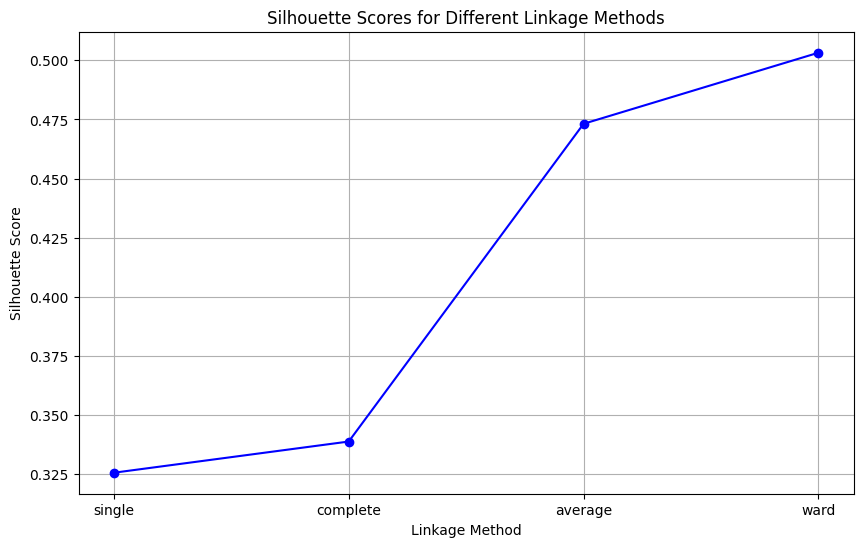

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

silhouette_scores = []

for method in linkage_methods:

    # hierarchical clustering
    linkage_matrix = linkage(final_df, method=method, metric='euclidean')

    num_clusters = 6
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    silhouette = silhouette_score(final_df, clusters)
    silhouette_scores.append(silhouette)

    print(f"Silhouette Score for {method} linkage: {silhouette}")

# Plots
plt.figure(figsize=(10, 6))
plt.plot(linkage_methods, silhouette_scores, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.xlabel("Linkage Method")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Linkage Methods")
plt.grid(True)

plt.show()


Tuning using distance metrics

Silhouette Score for complete linkage with euclidean distance: 0.3388447839303211
Silhouette Score for complete linkage with cityblock distance: 0.3206852714699998
Silhouette Score for complete linkage with cosine distance: 0.5013426526719684
Silhouette Score for complete linkage with chebyshev distance: 0.4620742193283422


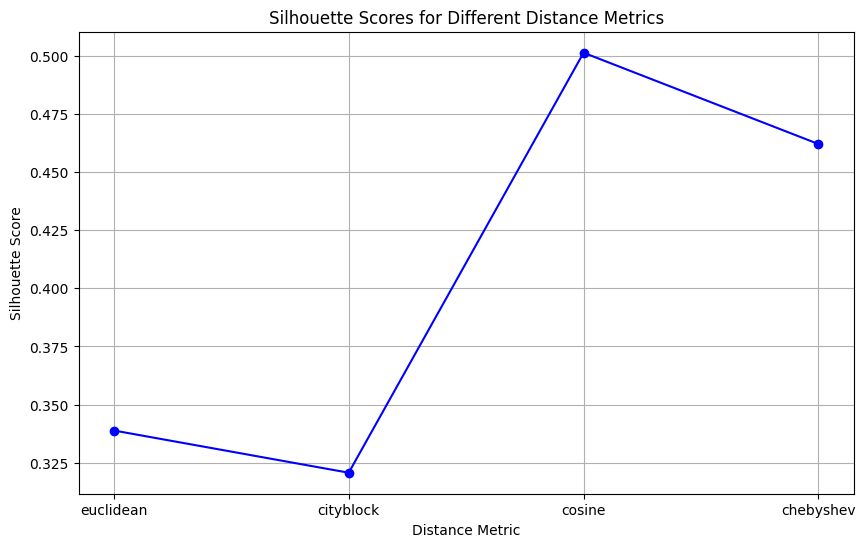

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# List of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine', 'chebyshev']

linkage_method = 'complete'  # vary the method

silhouette_scores = []

for metric in distance_metrics:
    #  hierarchical clustering
    linkage_matrix = linkage(final_df, method=linkage_method, metric=metric)

    num_clusters = 6
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    silhouette = silhouette_score(final_df, clusters)
    silhouette_scores.append(silhouette)

    print(f"Silhouette Score for {linkage_method} linkage with {metric} distance: {silhouette}")

# plot
plt.figure(figsize=(10, 6))
plt.plot(distance_metrics, silhouette_scores, marker='o', linestyle='-', color='b')  # Line plot
plt.xlabel("Distance Metric")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Distance Metrics")
plt.grid(True)
plt.show()


Trying boostrapping and averaging over the point to get cluster label:

Cluster Stability:
    DataPoint  Cluster
0           0        4
1           1        4
2           2        1
3           3        5
4           4        4
5           5        4
6           6        4
7           7        5
8           8        4
9           9        2
10         10        4
11         11        2
12         12        6
13         13        6
14         14        6
15         15        6
16         16        6
17         17        6
18         18        6
19         19        6
20         20        6
21         21        5
22         22        6
23         23        1
24         24        6
25         25        6
26         26        6
27         27        2
28         28        2
29         29        3
30         30        5
31         31        1
32         32        1
33         33        1
34         34        1
35         35        1


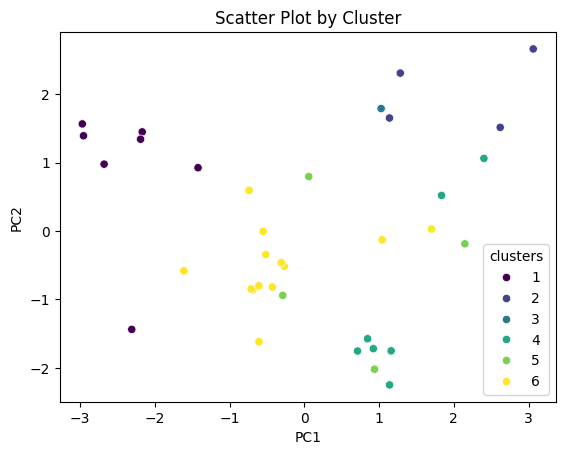

In [ ]:
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import pandas as pd

data = final_df
data['DataPoint'] = data.index

def bootstrap_clusters(data, num_clusters, num_samples=500):
    cluster_assignments = []

    for _ in range(num_samples):
        # Resample the data with original indices
        resampled_data = resample(data)

        # hierarchical clustering on resampled data
        linkage_matrix = linkage(resampled_data[['PC1', 'PC2', 'PC3', 'PC4']], method='average', metric = 'chebyshev')

        # get cluster assignments
        clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

        # add original indices to the cluster assignments
        cluster_assignments.append((resampled_data['DataPoint'].values, clusters))

    return cluster_assignments

num_clusters = 6

cluster_results = bootstrap_clusters(data, num_clusters, num_samples=100)

cluster_assignments = {i: [] for i in data['DataPoint']}

for indices, clusters in cluster_results:
    for idx, cluster in zip(indices, clusters):
        cluster_assignments[idx].append(cluster)

# determine most frequent cluster for each data point
stability = [np.argmax(np.bincount(cluster_assignments[i])) for i in data['DataPoint']]

stability_df = pd.DataFrame({'DataPoint': data['DataPoint'], 'Cluster': stability})

print("Cluster Stability:")
print(stability_df)

data_clustered = data
data_clustered['clusters'] = stability
sns.scatterplot(data=data_clustered, x='PC1', y='PC2', hue='clusters', palette='viridis')
plt.title("Scatter Plot by Cluster")
plt.show()


